In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    roc_auc_score, 
    precision_recall_curve
)

import warnings
warnings.filterwarnings("ignore")

# Преобразование данны

In [2]:
# Загрузка датасета 
olympic_df = pd.read_csv("athletes.csv")
olympic_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
olympic_df["dob"] = pd.to_datetime(olympic_df["dob"])

In [5]:
olympic_df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [6]:
# Пропуски решил заполнить средними значениями по данным, вместо того, что бы их удалять.
# Возможно это задача обучения без учителя, сделать модель для заполнения наиболее адекватныи данными, но я пока что не знаю, как это делать т_т
olympic_df["height"] = olympic_df["height"].fillna(olympic_df["height"].mean())
olympic_df["weight"] = olympic_df["weight"].fillna(olympic_df["weight"].mean())
olympic_df["dob"] = olympic_df["dob"].fillna(olympic_df["dob"].mean())
olympic_df.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [7]:
# У целевых признаков наблюдается небольшой дисбаланс, думаю это не критично
print(f"Count male: {len(olympic_df.query("sex == 'male'"))} \nCount female: {len(olympic_df.query("sex == 'female'"))}")

Count male: 6333 
Count female: 5205


In [8]:
le = LabelEncoder()
le.fit_transform(olympic_df[["sex"]])
print(f"classes: {le.classes_}")
print(f"male: {le.transform(['male'])[0]}\nfemale: {le.transform(['female'])[0]}")

classes: ['female' 'male']
male: 1
female: 0


In [9]:
# Прогнозирование пола участника олимпиады
X = olympic_df[["height", "weight", "sport", "nationality"]]
X = pd.get_dummies(X)
y = olympic_df["sex"]
y = le.transform(olympic_df["sex"])
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,1.72,64.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.81,71.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Разделение выборки

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
logistic_model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
    )
logistic_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# Метрики Precision, Recall, F1, ROC-AUC

In [12]:
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)

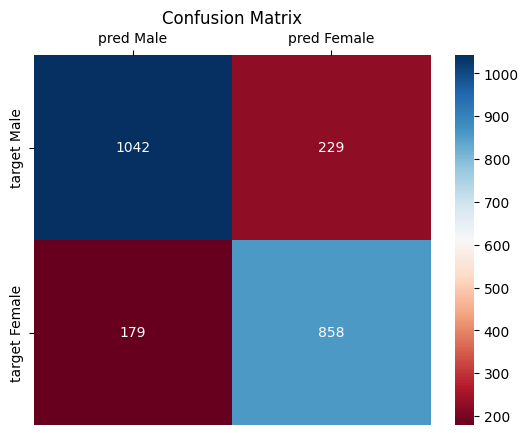

In [13]:
errors_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
errors_matrix_df = pd.DataFrame(
    errors_matrix, 
    columns=["pred Male", "pred Female"],
    index=["target Male", "target Female"],
    
    )
ax = sns.heatmap(errors_matrix_df, fmt="d", annot=True, cmap="RdBu")
ax.xaxis.tick_top()
ax.set(xlabel="", ylabel="")
plt.title("Confusion Matrix")
plt.show()

In [64]:
print( "+-----------+--------+")
print(f"| score     | {round(logistic_model.score(X_test, y_test), 3)}% |")
print(f"| precision | {round(precision_score(y_test, y_pred, average="binary"), 3)}% |")
print(f"| recall    | {round(recall_score(y_test, y_pred, average="binary"), 3)}%  |")
print(f"| f1        | {round(f1_score(y_test, y_pred, average="binary"), 3)}% |")
print(f"| roc auc   | {round(roc_auc_score(y_test, y_pred_prob[:, 1]), 3)}% |")
print( "+-----------+--------+")

+-----------+--------+
| score     | 0.823% |
| precision | 0.853% |
| recall    | 0.82%  |
| f1        | 0.836% |
| roc auc   | 0.889% |
+-----------+--------+


# ROC-кривая c SkLearn

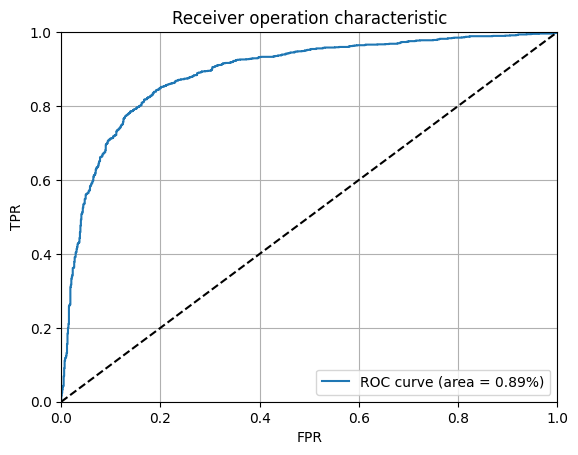

In [45]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.grid()
plt.plot(fpr, tpr, label=f"ROC curve (area = {round(roc_auc, 2)}%)")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver operation characteristic")
plt.legend(loc="lower right")
plt.show()

# Подсчет метрик TPR, FPR «вручную»

In [62]:
def get_precision_score(TP, FP):
    try:
        return TP / (TP + FP)
    except ZeroDivisionError:
        return 1
    
def get_recall_score(TP, FN):
    try:
        return TP / (TP + FN)
    except ZeroDivisionError:
        return 1
    
def get_tpr_score(TP, FN):
    try:
        return TP / (TP + FN)
    except ZeroDivisionError:
        return 0

def get_fpr_score(FP, TN):
    try:
        return FP / (FP + TN)
    except ZeroDivisionError:
        return 0

In [55]:
my_precision_list = []
my_recall_list = []
my_tpr_list = []
my_fpr_list = []

for i in range(1, 101, 1):
    i = i / 100
    iter_target_lst = np.where(y_pred_prob[:, 1] > i, 1, 0)
    TP, FP, FN, TN = 0, 0, 0, 0
    for j in range(len(iter_target_lst)):
        if iter_target_lst[j] == 1 and y_test[j] == 1:
            TP += 1
        if iter_target_lst[j] == 1 and y_test[j] == 0:
            FP += 1
        if iter_target_lst[j] == 0 and y_test[j] == 1:
            FN += 1
        if iter_target_lst[j] == 0 and y_test[j] == 0:
            TN += 1
    my_precision_list.append(get_precision_score(TP, FP))
    my_recall_list.append(get_recall_score(TP, FN))
    my_tpr_list.append(get_tpr_score(TP, FN))
    my_fpr_list.append(get_fpr_score(FP, TN))


# ROC-кривая с значениями, вычисленными вручную и SkLearn

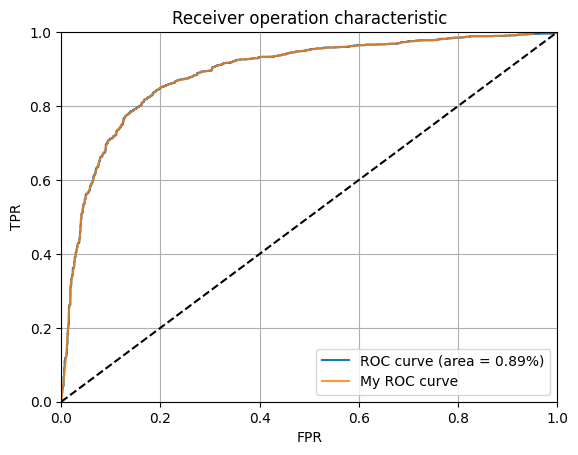

In [56]:
# Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
plt.grid()
plt.plot(fpr, tpr, label=f"ROC curve (area = {round(roc_auc, 2)}%)")
plt.plot(my_fpr_list, my_tpr_list, label=f"My ROC curve", alpha=0.8)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver operation characteristic")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall с значениями, вычисленными вручную и SkLearn

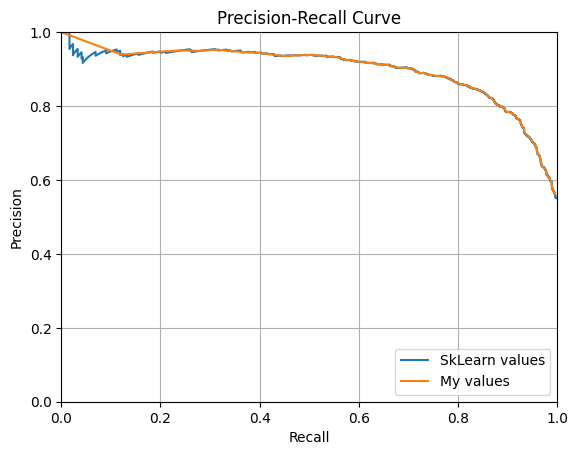

In [70]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
plt.plot(recall, precision, label="SkLearn values")
plt.plot(my_recall_list, my_precision_list, label="My values")
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Ручное вычислите значение ROC-AUC метрики

In [74]:
def get_auc(TPR: list, FPR: list):
    sorted_points = sorted(zip(FPR, TPR))
    FPR_sorted, TPR_sorted = zip(*sorted_points)

    auc = 0
    for i in range(len(TPR_sorted) - 1):
        auc += (FPR_sorted[i+1] - FPR_sorted[i]) * ((TPR_sorted[i+1] + TPR_sorted[i]) / 2)
    return auc



print(f"My ROC-AUC: {get_auc(my_tpr_list, my_fpr_list)}")

My ROC-AUC: 0.8404236028548733


# Выводы
1. __Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?__
### Графики
По графику ROC-curve можно делать выводы, насколько модель устойчива к порогу отнесения значения к определенному классу - чем ближе кривая находится к левому верхнему углу - тем лучше. Уместно использовать при сбалансированном количестве классов.В противном случае можно использовать Precision-Recall график, который тоже можно интерпретировать как стабильность модели - чем дальше от 0.5 - тем лучше. 

### Метрики
В зависимости от задачи можно выбирать определенные метрики, например в случае, когда нам нужно получать классификации даже большой ценой, можно использовать Precision (например в данных правильных ответов 6 из 10, а модель выдает 8 из 10, тут Precision стремится к 1), а в ситуации, когда нам важна точность, полнота правильно классифицированных объектов, нужно ставить приоритет на Recall (например в данных правильных ответов 6 из 10, а модель выдает 5 из 10, тут Recall примерно 0.83..., если ответов модели больше чем есть на самом деле, Recall будет уменьшаться)

2. Может ли ROC-кривая проходить ниже диагонали? 

Может, если лэйблы выдаются с точность. ниже, чем 0.5. Но разве такая модель плоха? В таком случае можно поменять метки ответов и модель будет вести себя адекватно